In [12]:
### Import libraries
import pandas as pd  
import numpy as np 
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import pairwise_distances_argmin_min


In [13]:
### Read the data 
attr=pd.read_csv("enter your path")
attr.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [14]:
bbox=pd.read_csv("enter your path")
bbox.head()
print(bbox["width"].mean())

print(bbox["height"].mean())

194.75406097759614
268.92232933035206


In [15]:
eval = pd.read_csv("enter your path")
eval.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [16]:
landmarks=pd.read_csv("enter your path")
landmarks.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [17]:
### function to preprocess the images i choose image size 200 by 200 because it is close to the means 
def preprocess_image(image_path, image_size=(200, 200)):
    image = Image.open(image_path)
    # Resize image
    image = image.resize(image_size)
    # Convert to grayscale
    image = image.convert('L')
    # Flatten image
    image_array = np.array(image).flatten()
    return image_array

In [18]:
dataset_dir="enter your path"

In [19]:
# Get paths to image files in dataset directory
image_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if filename.endswith('.jpg')]

In [20]:
len(image_files)

202599

In [21]:
### load and preprocess the first 1000 images 
preprocessed_data = [preprocess_image(image_path) for image_path in image_files[:100]]
preprocessed_data = np.array(preprocessed_data)


In [22]:
len(preprocessed_data[0])

40000

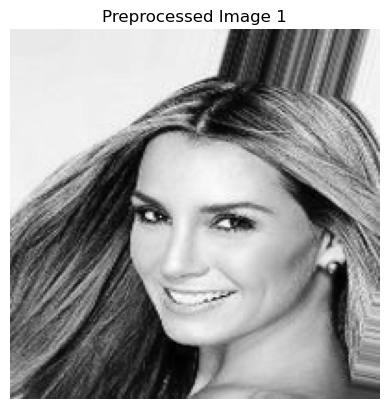

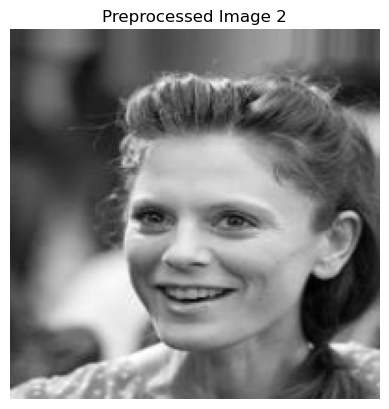

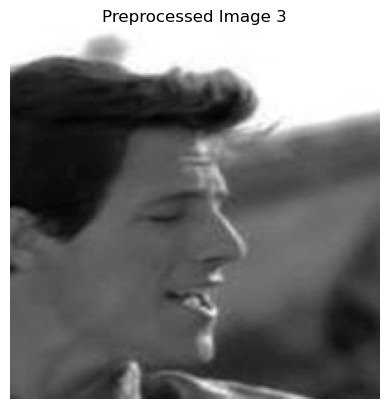

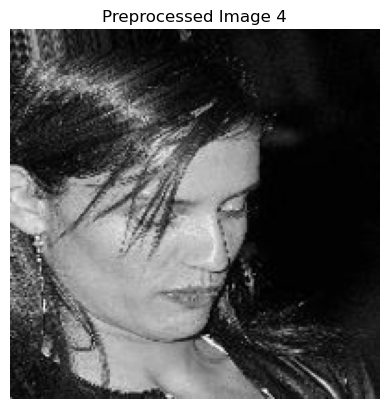

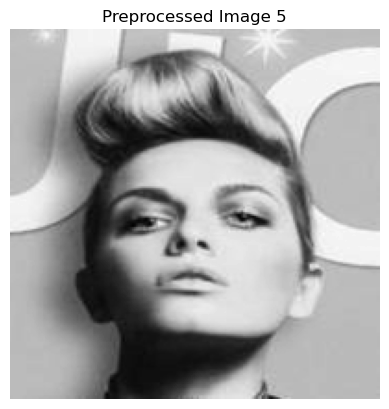

In [23]:
# Visualize preprocessed images
num_images_to_show = 5  # Number of images to show

# Loop through the preprocessed images and display them
for i in range(num_images_to_show):
    # Reshape the flattened image data to its original shape 
    image = preprocessed_data[i].reshape((200, 200))
    
    # Display the image
    plt.imshow(image, cmap='gray')  # Display as grayscale
    plt.title(f"Preprocessed Image {i+1}")
    plt.axis('off')  # Hide axis
    plt.show()


In [24]:

# Initialize Incremental PCA with desired number of components
num_components = 50  # You can adjust this value as needed
incremental_pca = IncrementalPCA(n_components=num_components)

# Process data in mini-batches and fit Incremental PCA
chunk_size = 1000  # Adjust chunk size based on memory constraints
for i in range(0, len(preprocessed_data), chunk_size):
    chunk = preprocessed_data[i:i+chunk_size]
    incremental_pca.partial_fit(chunk)

# Transform the data using the fitted Incremental PCA model
transformed_data = []
for i in range(0, len(preprocessed_data), chunk_size):
    chunk = preprocessed_data[i:i+chunk_size]
    transformed_chunk = incremental_pca.transform(chunk)
    transformed_data.append(transformed_chunk)

# Concatenate the transformed chunks to get the final transformed data
transformed_data = np.concatenate(transformed_data)


In [25]:
your_preprocessed_face = preprocess_image("enter your path")  # Use your existing preprocess_image function here


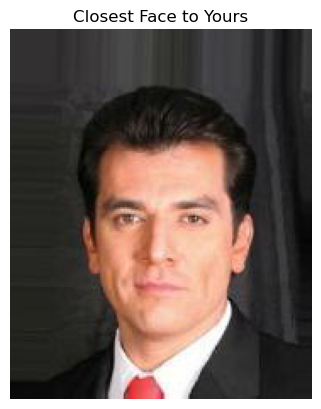

In [27]:
# Load and preprocess your face
# Transform your face using the fitted Incremental PCA model
your_face_transformed = incremental_pca.transform(your_preprocessed_face.reshape(1, -1))

# Calculate pairwise distances between your face and all faces in the dataset
pairwise_distances = []
for face in preprocessed_data:
    pairwise_distances.append(np.linalg.norm(face - your_preprocessed_face))

# Find the index of the closest face in the dataset
closest_face_index = np.argmin(pairwise_distances)

# Get the path to the image file of the closest face
closest_face_path = image_files[closest_face_index]

# Visualize the closest face
closest_face = plt.imread(closest_face_path)
plt.imshow(closest_face, cmap='gray')
plt.title('Closest Face to Yours')
plt.axis('off')
plt.show()
